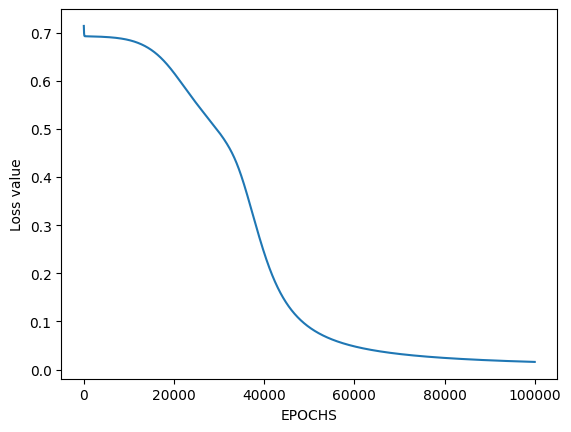

[[1. 0. 0. 1.]]


In [1]:
# Import Python Libraries
import numpy as np
import matplotlib.pyplot as plt
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initialize_parameters(input_features, neurons_in_hidden_layers, output_features):
    W1 = np.random.randn(neurons_in_hidden_layers, input_features)
    W2 = np.random.randn(output_features, neurons_in_hidden_layers)
    b1 = np.zeros((neurons_in_hidden_layers, 1))
    b2 = np.zeros((output_features, 1))

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

# Backward Propagation
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    Z1, A1, W1, b1, Z2, A2, W2, b2 = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def update_parameters(parameters, gradients, learning_rate):
    parameters["W1"] = parameters["W1"] - learning_rate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learning_rate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learning_rate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learning_rate * gradients["db2"]
    return parameters
# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # XOR input
Y = np.array([[0, 1, 1, 0]])  # XOR output
# Define model parameters
neurons_in_hidden_layers = 2  # number of hidden layer neurons (2)
input_features = X.shape[0]  # number of input features (2)
output_features = Y.shape[0]  # number of output features (1)
parameters = initialize_parameters(input_features, neurons_in_hidden_layers, output_features)
epoch = 100000
learning_rate = 0.01
losses = np.zeros((epoch, 1))
for i in range(epoch):
    # Forward Propagation
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m

    # Backward Propagation
    gradients = backward_propagation(X, Y, cache)

    # Updating the weights
    parameters = update_parameters(parameters, gradients, learning_rate)

    # Store the loss for plotting
    losses[i, 0] = cost
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # XOR input for testing
Z1_test = np.dot(parameters["W1"], X_test) + parameters["b1"]
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(parameters["W2"], A1_test) + parameters["b2"]
A2_test = sigmoid(Z2_test)
prediction = (A2_test > 0.5) * 1.0
print(prediction)